# Context

The dataset is sourced from the IESO(HOEP, Ontario Demand) website which is an independent electricity system operator. 

# Content

In the IESO-administered market, the Hourly Ontario Energy Price (HOEP) is charged to local distribution companies (LDCs), other non-dispatchable loads and paid to self-scheduling generators. Businesses that use more than 250,000 kWh a year pay the hourly price. The HOEP is also the basis for regulated rates charged to residential and small business customers. The HOEP values are reported as $/MWh.

# Acknowledgements

More details can be sourced from:                 
HOEP and Demand: http://www.ieso.ca/            
Weather: https://toronto.weatherstats.ca/

# Data Preparation - Import Library Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import codecs
import math
import decimal

In [3]:
# Data Directories
hoep_2016 = pd.read_csv('ON_HOEP_PRICE_2016.csv')
hoep_2017 = pd.read_csv('ON_HOEP_PRICE_2017.csv')
hoep_2018 = pd.read_csv('ON_HOEP_PRICE_2018.csv')
hoep_2019 = pd.read_csv('ON_HOEP_PRICE_2019.csv')
hoep_2020 = pd.read_csv('ON_HOEP_PRICE_2020.csv')

demand_2016 = pd.read_csv('Demand_2016.csv')
demand_2017 = pd.read_csv('Demand_2017.csv')
demand_2018 = pd.read_csv('Demand_2018.csv')
demand_2019 = pd.read_csv('Demand_2019.csv')
demand_2020 = pd.read_csv('Demand_2020.csv')

weather = pd.read_csv('ON_Weather.csv')

# Data Cleansing Combined Ontario HOEP Data (2016-2020)

In [4]:
on_hoep_comb = pd.concat([hoep_2016,hoep_2017,hoep_2018,hoep_2019,hoep_2020])
on_hoep_comb.head(5)

,Date,Hour,HOEP
0,2016-01-01,1,-1.09
1,2016-01-01,2,-2.41
2,2016-01-01,3,-4.23
3,2016-01-01,4,-4.40
4,2016-01-01,5,-4.44


In [5]:
on_hoep_comb['Hour'] = on_hoep_comb['Hour'].replace([24], 0)
on_hoep_comb.tail(5)

,Date,Hour,HOEP
8779,2020-12-31,20,19.69
8780,2020-12-31,21,20.78
8781,2020-12-31,22,27.85
8782,2020-12-31,23,19.68
8783,2020-12-31,0,27.37


In [6]:
on_hoep_comb = on_hoep_comb.sort_values(['Date', 'Hour'], ascending=[True, True])
on_hoep_comb.head(5)

,Date,Hour,HOEP
23,2016-01-01,0,0.49
0,2016-01-01,1,-1.09
1,2016-01-01,2,-2.41
2,2016-01-01,3,-4.23
3,2016-01-01,4,-4.40


In [7]:
on_hoep_comb = pd.DataFrame(on_hoep_comb).set_index('Date')

In [8]:
on_hoep_comb = pd.DataFrame(on_hoep_comb).reset_index('Date')
on_hoep_comb.head(5)

,Date,Hour,HOEP
0,2016-01-01,0,0.49
1,2016-01-01,1,-1.09
2,2016-01-01,2,-2.41
3,2016-01-01,3,-4.23
4,2016-01-01,4,-4.40


# Weather

In [9]:
weather.head(5)

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,...,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation,max_air_temp_pst1hr,min_air_temp_pst1hr
0,2016-01-01 00:00:00 EST,1451624400,99.67,101.82,SW,23.0,20.0,31.0,70.0,-5.1,...,-6.0,NaN,24100.0,2.6,NaN,8.0,NaN,NaN,0.0,-0.3
1,2016-01-01 01:00:00 EST,1451628000,99.63,101.78,WSW,24.0,25.0,NaN,68.0,-5.5,...,-6.0,NaN,24100.0,2.6,NaN,8.0,NaN,NaN,-0.2,-0.3
2,2016-01-01 02:00:00 EST,1451631600,99.59,101.74,WSW,25.0,26.0,40.0,73.0,-4.7,...,-7.0,NaN,24100.0,2.6,NaN,8.0,NaN,NaN,-0.3,-0.4
3,2016-01-01 03:00:00 EST,1451635200,99.56,101.71,WSW,24.0,30.0,NaN,73.0,-4.7,...,-7.0,NaN,24100.0,2.6,NaN,8.0,NaN,NaN,-0.3,-0.5
4,2016-01-01 04:00:00 EST,1451638800,99.53,101.68,W,25.0,31.0,42.0,68.0,-5.6,...,-7.0,NaN,24100.0,2.6,NaN,8.0,NaN,NaN,-0.4,-0.5


In [10]:
print(weather.isnull().sum())

date_time_local            0
unixtime                   0
pressure_station           6
pressure_sea               6
wind_dir                 819
wind_dir_10s              23
wind_speed                 6
wind_gust              33177
relative_humidity         11
dew_point                  8
temperature                8
windchill              34326
humidex                35978
visibility                 6
health_index             463
cloud_cover_4          43848
cloud_cover_8            424
cloud_cover_10         43848
solar_radiation        43848
max_air_temp_pst1hr       52
min_air_temp_pst1hr       50
dtype: int64


In [11]:
weather['Windchill_Index'] = weather.apply(lambda row: 13.12+(0.6215*row.min_air_temp_pst1hr)-(11.37*row.wind_speed**0.16)+(0.3965*row.min_air_temp_pst1hr*row.wind_speed**0.16), axis = 1)
weather['Dew_kelvins'] = weather.apply(lambda row: (row.dew_point + 273.15), axis = 1)
weather['Air_kelvins'] = weather.apply(lambda row: (row.max_air_temp_pst1hr + 273.15), axis = 1)
weather['vap_pre'] = weather.apply(lambda row: 6.11 *10**((7.5*row.max_air_temp_pst1hr)/(237.3+row.max_air_temp_pst1hr)),axis = 1)
weather['re_humi'] = weather.apply(lambda row: (row.relative_humidity/100), axis = 1)
weather['Humidex'] = weather.apply(lambda row: (row.max_air_temp_pst1hr + 0.5555*(row.vap_pre*row.re_humi-10)), axis = 1)
weather.head(5)

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,...,cloud_cover_10,solar_radiation,max_air_temp_pst1hr,min_air_temp_pst1hr,Windchill_Index,Dew_kelvins,Air_kelvins,vap_pre,re_humi,Humidex
0,2016-01-01 00:00:00 EST,1451624400,99.67,101.82,SW,23.0,20.0,31.0,70.0,-5.1,...,NaN,NaN,0.0,-0.3,-5.620774,268.05,273.15,6.110000,0.70,-3.179126
1,2016-01-01 01:00:00 EST,1451628000,99.63,101.78,WSW,24.0,25.0,NaN,68.0,-5.5,...,NaN,NaN,-0.2,-0.3,-6.295186,267.65,272.95,6.021640,0.68,-3.480386
2,2016-01-01 02:00:00 EST,1451631600,99.59,101.74,WSW,25.0,26.0,40.0,73.0,-4.7,...,NaN,NaN,-0.3,-0.4,-6.545161,268.45,272.85,5.977885,0.73,-3.430878
3,2016-01-01 03:00:00 EST,1451635200,99.56,101.71,WSW,24.0,30.0,NaN,73.0,-4.7,...,NaN,NaN,-0.3,-0.5,-7.125329,268.45,272.85,5.977885,0.73,-3.430878
4,2016-01-01 04:00:00 EST,1451638800,99.53,101.68,W,25.0,31.0,42.0,68.0,-5.6,...,NaN,NaN,-0.4,-0.5,-7.230188,267.55,272.75,5.934411,0.68,-3.713335


In [12]:
weather['Date_1'] = pd.to_datetime(weather['date_time_local'], errors='coerce')

In [13]:
format = '%Y-%m-%dT%H:%M:%S %Z'
weather['Actual_Date'] = pd.to_datetime(weather['Date_1'], format=format)
weather['Weekday'] = weather['Actual_Date'].dt.day_name()
weather['Day_Hour'] = weather['Actual_Date'].dt.hour
weather['Week_Time_Date'] = weather['Actual_Date'].dt.date

weather.head(5)

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,...,Dew_kelvins,Air_kelvins,vap_pre,re_humi,Humidex,Date_1,Actual_Date,Weekday,Day_Hour,Week_Time_Date
0,2016-01-01 00:00:00 EST,1451624400,99.67,101.82,SW,23.0,20.0,31.0,70.0,-5.1,...,268.05,273.15,6.110000,0.70,-3.179126,2016-01-01 00:00:00-05:00,2016-01-01 00:00:00-05:00,Friday,0,2016-01-01
1,2016-01-01 01:00:00 EST,1451628000,99.63,101.78,WSW,24.0,25.0,NaN,68.0,-5.5,...,267.65,272.95,6.021640,0.68,-3.480386,2016-01-01 01:00:00-05:00,2016-01-01 01:00:00-05:00,Friday,1,2016-01-01
2,2016-01-01 02:00:00 EST,1451631600,99.59,101.74,WSW,25.0,26.0,40.0,73.0,-4.7,...,268.45,272.85,5.977885,0.73,-3.430878,2016-01-01 02:00:00-05:00,2016-01-01 02:00:00-05:00,Friday,2,2016-01-01
3,2016-01-01 03:00:00 EST,1451635200,99.56,101.71,WSW,24.0,30.0,NaN,73.0,-4.7,...,268.45,272.85,5.977885,0.73,-3.430878,2016-01-01 03:00:00-05:00,2016-01-01 03:00:00-05:00,Friday,3,2016-01-01
4,2016-01-01 04:00:00 EST,1451638800,99.53,101.68,W,25.0,31.0,42.0,68.0,-5.6,...,267.55,272.75,5.934411,0.68,-3.713335,2016-01-01 04:00:00-05:00,2016-01-01 04:00:00-05:00,Friday,4,2016-01-01


In [14]:
weather = weather[['Week_Time_Date','Day_Hour', 'Weekday','temperature','Windchill_Index','wind_speed','Humidex','relative_humidity','dew_point','pressure_station']]
weather.head(5)

,Week_Time_Date,Day_Hour,Weekday,temperature,Windchill_Index,wind_speed,Humidex,relative_humidity,dew_point,pressure_station
0,2016-01-01,0,Friday,-0.3,-5.620774,20.0,-3.179126,70.0,-5.1,99.67
1,2016-01-01,1,Friday,-0.3,-6.295186,25.0,-3.480386,68.0,-5.5,99.63
2,2016-01-01,2,Friday,-0.4,-6.545161,26.0,-3.430878,73.0,-4.7,99.59
3,2016-01-01,3,Friday,-0.4,-7.125329,30.0,-3.430878,73.0,-4.7,99.56
4,2016-01-01,4,Friday,-0.4,-7.230188,31.0,-3.713335,68.0,-5.6,99.53


# Demand

In [15]:
demand_comb = pd.concat([demand_2016,demand_2017,demand_2018,demand_2019,demand_2020])
demand_comb.head(5)

,Date,Hour,Market Demand,Ontario Demand
0,2016-01-01,1,16767,13417
1,2016-01-01,2,16751,12968
2,2016-01-01,3,16319,12395
3,2016-01-01,4,16148,12228
4,2016-01-01,5,16054,12116


In [16]:
demand_comb['Hour'] = demand_comb['Hour'].replace([24], 0)
demand_comb.tail(5)

,Date,Hour,Market Demand,Ontario Demand
8779,2020-12-31,20,18332,16783
8780,2020-12-31,21,17727,16154
8781,2020-12-31,22,17127,15744
8782,2020-12-31,23,16673,15092
8783,2020-12-31,0,16723,14665


# Demand Sorting Hour by Date Table

In [17]:
demand_comb = demand_comb.sort_values(['Date', 'Hour'], ascending=[True, True])
demand_comb.head(5)

,Date,Hour,Market Demand,Ontario Demand
23,2016-01-01,0,17442,14023
0,2016-01-01,1,16767,13417
1,2016-01-01,2,16751,12968
2,2016-01-01,3,16319,12395
3,2016-01-01,4,16148,12228


In [18]:
demand_comb = pd.DataFrame(demand_comb).set_index('Date')

In [19]:
demand_comb = pd.DataFrame(demand_comb).reset_index('Date')
demand_comb.head(5)

,Date,Hour,Market Demand,Ontario Demand
0,2016-01-01,0,17442,14023
1,2016-01-01,1,16767,13417
2,2016-01-01,2,16751,12968
3,2016-01-01,3,16319,12395
4,2016-01-01,4,16148,12228


# Ontario HOEP, Demand, Weather Combination

In [20]:
comb = pd.concat([on_hoep_comb,demand_comb,weather], axis=1)
comb.head(5)

,Date,Hour,HOEP,Date,Hour,Market Demand,Ontario Demand,Week_Time_Date,Day_Hour,Weekday,temperature,Windchill_Index,wind_speed,Humidex,relative_humidity,dew_point,pressure_station
0,2016-01-01,0,0.49,2016-01-01,0,17442,14023,2016-01-01,0,Friday,-0.3,-5.620774,20.0,-3.179126,70.0,-5.1,99.67
1,2016-01-01,1,-1.09,2016-01-01,1,16767,13417,2016-01-01,1,Friday,-0.3,-6.295186,25.0,-3.480386,68.0,-5.5,99.63
2,2016-01-01,2,-2.41,2016-01-01,2,16751,12968,2016-01-01,2,Friday,-0.4,-6.545161,26.0,-3.430878,73.0,-4.7,99.59
3,2016-01-01,3,-4.23,2016-01-01,3,16319,12395,2016-01-01,3,Friday,-0.4,-7.125329,30.0,-3.430878,73.0,-4.7,99.56
4,2016-01-01,4,-4.40,2016-01-01,4,16148,12228,2016-01-01,4,Friday,-0.4,-7.230188,31.0,-3.713335,68.0,-5.6,99.53


In [21]:
comb_a = comb[['Week_Time_Date','Weekday','Day_Hour','HOEP','Ontario Demand','temperature','Windchill_Index','wind_speed','Humidex','relative_humidity','dew_point','pressure_station' ]]
comb_a.head(5)

,Week_Time_Date,Weekday,Day_Hour,HOEP,Ontario Demand,temperature,Windchill_Index,wind_speed,Humidex,relative_humidity,dew_point,pressure_station
0,2016-01-01,Friday,0,0.49,14023,-0.3,-5.620774,20.0,-3.179126,70.0,-5.1,99.67
1,2016-01-01,Friday,1,-1.09,13417,-0.3,-6.295186,25.0,-3.480386,68.0,-5.5,99.63
2,2016-01-01,Friday,2,-2.41,12968,-0.4,-6.545161,26.0,-3.430878,73.0,-4.7,99.59
3,2016-01-01,Friday,3,-4.23,12395,-0.4,-7.125329,30.0,-3.430878,73.0,-4.7,99.56
4,2016-01-01,Friday,4,-4.40,12228,-0.4,-7.230188,31.0,-3.713335,68.0,-5.6,99.53


In [22]:
print(comb_a.isnull().sum())

Week_Time_Date        0
Weekday               0
Day_Hour              0
HOEP                  0
Ontario Demand        0
temperature           8
Windchill_Index      50
wind_speed            6
Humidex              57
relative_humidity    11
dew_point             8
pressure_station      6
dtype: int64


In [23]:
print(len(comb_a))
comb_a = comb_a.dropna()
print(len(comb_a))

43848
43790


In [24]:
print(comb_a.isnull().sum())

Week_Time_Date       0
Weekday              0
Day_Hour             0
HOEP                 0
Ontario Demand       0
temperature          0
Windchill_Index      0
wind_speed           0
Humidex              0
relative_humidity    0
dew_point            0
pressure_station     0
dtype: int64


# Clean Data Standard Divation (0.005 and 0.95)

In [25]:
lower_limit_on_hoep_comb = comb_a["HOEP"].quantile(0.05)
lower_limit_on_hoep_comb

-2.78

In [26]:
upper_limit_on_hoep_comb = comb_a["HOEP"].quantile(0.95)
upper_limit_on_hoep_comb

44.115499999999955

In [27]:
clean_hoep_on_comb = comb_a[(comb_a['HOEP'] > lower_limit_on_hoep_comb) & (comb_a['HOEP'] < upper_limit_on_hoep_comb)]
clean_hoep_on_comb.head(5)

,Week_Time_Date,Weekday,Day_Hour,HOEP,Ontario Demand,temperature,Windchill_Index,wind_speed,Humidex,relative_humidity,dew_point,pressure_station
0,2016-01-01,Friday,0,0.49,14023,-0.3,-5.620774,20.0,-3.179126,70.0,-5.1,99.67
1,2016-01-01,Friday,1,-1.09,13417,-0.3,-6.295186,25.0,-3.480386,68.0,-5.5,99.63
2,2016-01-01,Friday,2,-2.41,12968,-0.4,-6.545161,26.0,-3.430878,73.0,-4.7,99.59
12,2016-01-01,Friday,12,0.00,14215,-2.1,-8.720623,23.0,-4.860824,76.0,-5.8,99.39
13,2016-01-01,Friday,13,0.00,14443,-2.4,-8.233649,19.0,-5.093181,84.0,-4.7,99.35


/Users/jadenkim/opt/anaconda3/envs/test1/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='HOEP'>

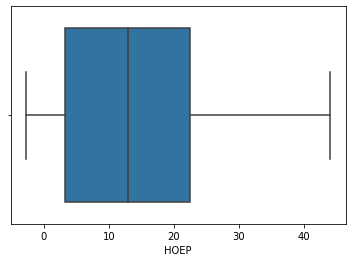

In [28]:
sns.boxplot(clean_hoep_on_comb['HOEP'])

In [29]:
clean_hoep_on_comb = clean_hoep_on_comb.rename(columns = {'Week_Time_Date': 'Date','Day_Hour': 'Hour','Ontario Demand': 'Ontario_Demand','temperature': 'Temperature','wind_speed':'Wind_Speed','relative_humidity':'Relative_Humidity','dew_point':'Dew_Point','pressure_station':'Pressure_Station'})
clean_hoep_on_comb.head(5)

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
0,2016-01-01,Friday,0,0.49,14023,-0.3,-5.620774,20.0,-3.179126,70.0,-5.1,99.67
1,2016-01-01,Friday,1,-1.09,13417,-0.3,-6.295186,25.0,-3.480386,68.0,-5.5,99.63
2,2016-01-01,Friday,2,-2.41,12968,-0.4,-6.545161,26.0,-3.430878,73.0,-4.7,99.59
12,2016-01-01,Friday,12,0.00,14215,-2.1,-8.720623,23.0,-4.860824,76.0,-5.8,99.39
13,2016-01-01,Friday,13,0.00,14443,-2.4,-8.233649,19.0,-5.093181,84.0,-4.7,99.35


In [30]:
clean_hoep_on_comb = pd.DataFrame(clean_hoep_on_comb).set_index('Date')
clean_hoep_on_comb.head(5)

,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
Date,,,,,,,,,,,
2016-01-01,Friday,0,0.49,14023,-0.3,-5.620774,20.0,-3.179126,70.0,-5.1,99.67
2016-01-01,Friday,1,-1.09,13417,-0.3,-6.295186,25.0,-3.480386,68.0,-5.5,99.63
2016-01-01,Friday,2,-2.41,12968,-0.4,-6.545161,26.0,-3.430878,73.0,-4.7,99.59
2016-01-01,Friday,12,0.00,14215,-2.1,-8.720623,23.0,-4.860824,76.0,-5.8,99.39
2016-01-01,Friday,13,0.00,14443,-2.4,-8.233649,19.0,-5.093181,84.0,-4.7,99.35


In [31]:
clean_hoep_on_comb = pd.DataFrame(clean_hoep_on_comb).reset_index('Date')
clean_hoep_on_comb.head(5)

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
0,2016-01-01,Friday,0,0.49,14023,-0.3,-5.620774,20.0,-3.179126,70.0,-5.1,99.67
1,2016-01-01,Friday,1,-1.09,13417,-0.3,-6.295186,25.0,-3.480386,68.0,-5.5,99.63
2,2016-01-01,Friday,2,-2.41,12968,-0.4,-6.545161,26.0,-3.430878,73.0,-4.7,99.59
3,2016-01-01,Friday,12,0.00,14215,-2.1,-8.720623,23.0,-4.860824,76.0,-5.8,99.39
4,2016-01-01,Friday,13,0.00,14443,-2.4,-8.233649,19.0,-5.093181,84.0,-4.7,99.35


In [32]:
clean_hoep_on_comb.round(2)

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
0,2016-01-01,Friday,0,0.49,14023,-0.3,-5.62,20.0,-3.18,70.0,-5.1,99.67
1,2016-01-01,Friday,1,-1.09,13417,-0.3,-6.30,25.0,-3.48,68.0,-5.5,99.63
2,2016-01-01,Friday,2,-2.41,12968,-0.4,-6.55,26.0,-3.43,73.0,-4.7,99.59
3,2016-01-01,Friday,12,0.00,14215,-2.1,-8.72,23.0,-4.86,76.0,-5.8,99.39
4,2016-01-01,Friday,13,0.00,14443,-2.4,-8.23,19.0,-5.09,84.0,-4.7,99.35
...,...,...,...,...,...,...,...,...,...,...,...,...
39403,2020-12-31,Thursday,19,36.85,17384,0.2,-4.02,13.0,-2.69,74.0,-3.8,100.66
39404,2020-12-31,Thursday,20,19.69,16783,-0.2,-5.59,16.0,-3.58,65.0,-6.0,100.76
39405,2020-12-31,Thursday,21,20.78,16154,-3.0,-7.44,12.0,-3.67,80.0,-6.0,100.81
39406,2020-12-31,Thursday,22,27.85,15744,-0.8,-6.76,17.0,-4.11,70.0,-5.6,100.90


<AxesSubplot:xlabel='Date', ylabel='HOEP'>

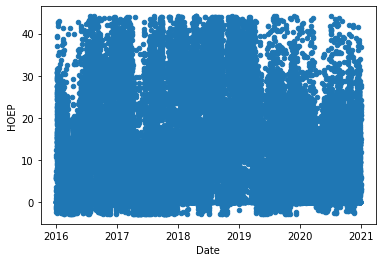

In [33]:
clean_hoep_on_comb.plot(kind='scatter', x='Date',y='HOEP')

In [34]:
clean_hoep_on_comb = pd.DataFrame(clean_hoep_on_comb).set_index('Date')
clean_hoep_on_comb.head(5)

,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
Date,,,,,,,,,,,
2016-01-01,Friday,0,0.49,14023,-0.3,-5.620774,20.0,-3.179126,70.0,-5.1,99.67
2016-01-01,Friday,1,-1.09,13417,-0.3,-6.295186,25.0,-3.480386,68.0,-5.5,99.63
2016-01-01,Friday,2,-2.41,12968,-0.4,-6.545161,26.0,-3.430878,73.0,-4.7,99.59
2016-01-01,Friday,12,0.00,14215,-2.1,-8.720623,23.0,-4.860824,76.0,-5.8,99.39
2016-01-01,Friday,13,0.00,14443,-2.4,-8.233649,19.0,-5.093181,84.0,-4.7,99.35


In [35]:
print(clean_hoep_on_comb.isnull().sum())

Weekday              0
Hour                 0
HOEP                 0
Ontario_Demand       0
Temperature          0
Windchill_Index      0
Wind_Speed           0
Humidex              0
Relative_Humidity    0
Dew_Point            0
Pressure_Station     0
dtype: int64


In [36]:
clean_hoep_on_comb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39408 entries, 2016-01-01 to 2020-12-31
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weekday            39408 non-null  object 
 1   Hour               39408 non-null  int64  
 2   HOEP               39408 non-null  float64
 3   Ontario_Demand     39408 non-null  int64  
 4   Temperature        39408 non-null  float64
 5   Windchill_Index    39408 non-null  float64
 6   Wind_Speed         39408 non-null  float64
 7   Humidex            39408 non-null  float64
 8   Relative_Humidity  39408 non-null  float64
 9   Dew_Point          39408 non-null  float64
 10  Pressure_Station   39408 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 3.6+ MB


In [35]:
clean_hoep_on_comb.to_csv('clean_hoep_on_comb_a1.csv')